In [11]:
import pretty_midi
import librosa
import numpy as np

import librosa.display
import matplotlib.pyplot as plt

import soundfile as sf
import sounddevice as sd
import io

# generate input data(contant-Q)

In [12]:
filename = "Flower_Dance.mid"
sr = 22050

In [13]:
midi_data = pretty_midi.PrettyMIDI(filename)

## generate wave format

In [14]:

audio_data = midi_data.fluidsynth(
    sr,
#     sf2_path='MuseScore_General.sf3', # default : TimGM6mb.sf2
)

print(f"{audio_data.shape=}")
print(f"{audio_data.dtype=}")
print(f"{audio_data.max()=}")
print(f"{audio_data.min()=}")

audio_data.shape=(6149058,)
audio_data.dtype=dtype('float64')
audio_data.max()=1.0
audio_data.min()=-0.9398881640260951


In [ ]:
sd.play(audio_data,sr)

In [ ]:
sd.stop()

## contant-Q transform

In [10]:
tempo, beat_frames = librosa.beat.beat_track(y=audio_data, sr=sr)
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

hop_len = 512
freq_w = 3
octave = 7

C = librosa.cqt(
    audio_data, sr=sr,
    hop_length= hop_len,
    n_bins= 12*freq_w*octave,
    bins_per_octave= 12*freq_w
)

print(f"{C.shape=}")
print(f"{C.dtype=}")
print(f"{C.max()=}")
print(f"{C.min()=}")

C.shape=(252, 24020)
C.dtype=dtype('complex128')
C.max()=(12.586115165092796+1.2876325037255838j)
C.min()=(-12.422504062384117-3.1976199242263394j)


## EDA

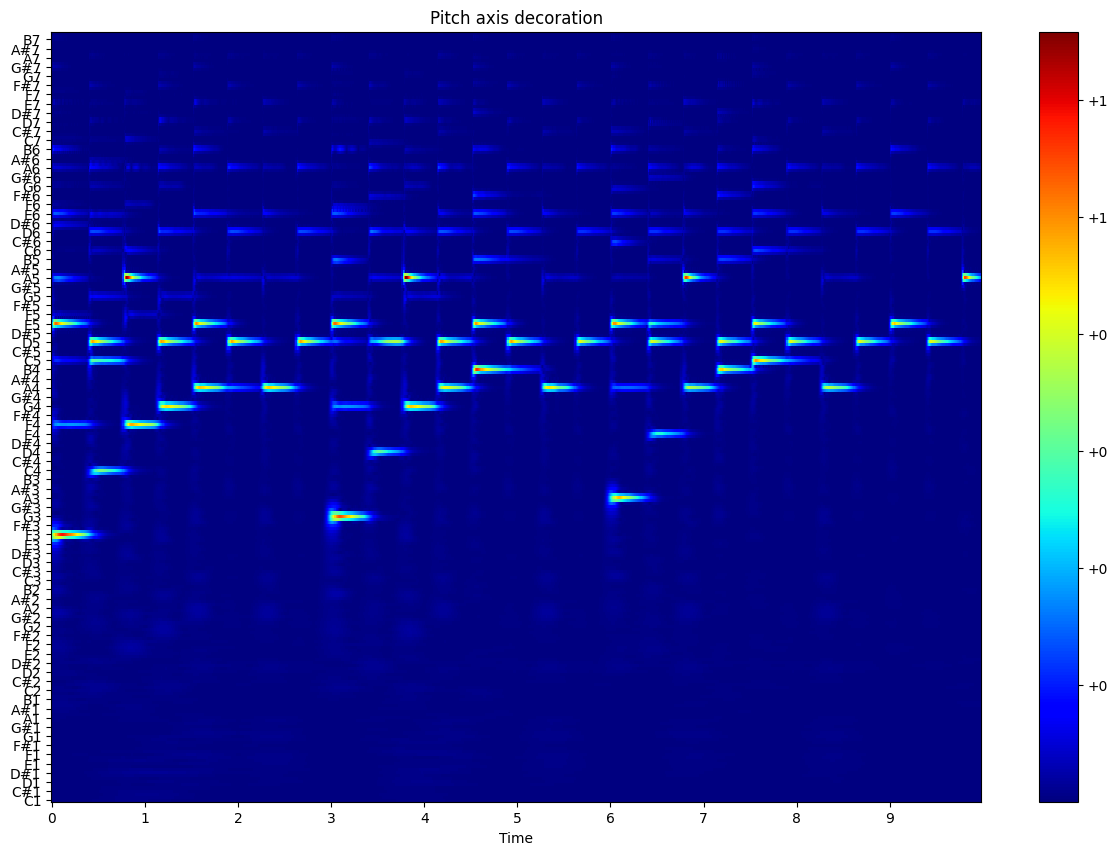

In [15]:
src = np.abs(C)

notes = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
y_ticks = np.arange(0,12*freq_w*octave,freq_w)
y_list=[]

for o in range(octave):
    for i in range(12):
        y_list.append(notes[i]+'%d'%(o+1))

plt.style.use('default')
fig, ax = plt.subplots(1,1,figsize=(15,10))
img = librosa.display.specshow(src[:,:sr//hop_len*10], sr=sr, x_axis='time', ax=ax, hop_length= hop_len, bins_per_octave= 12*freq_w,
                               cmap='jet'
                               )
ax.set(title='Pitch axis decoration')
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_list)
fig.colorbar(img, ax=ax, format="%+2d")
# for i in beat_times:
#     ax.axvline(i,c='k')

plt.show()

# generate target data(piano roll)

In [24]:
import gc
del audio_data, C, src
gc.collect()

11547

In [10]:
piano_roll = midi_data.get_piano_roll(sr)

plt.figure(figsize=(8,4))
librosa.display.specshow(
    piano_roll[24:107,sr*5], #[start_pitch:end_pitch],
    hop_length=1,
    sr=sr,
    x_axis='time',
    y_axis='cqt_note',
#     fmin=pretty_midi.note_number_to_hz(start_pitch)
)
plt.show()

MemoryError: Unable to allocate 4.06 GiB for an array with shape (128, 4262319) and data type float64